# Experimentos con Dataset Disvoice Hombres
## Adrián Arnaiz
> * Ruta: */ser/CaracteristicasExtraidas/DivisionSexo/hombres*
* Módulo de carga de datos: */src/cargaDatosHombres.py*
     * Cada uno Contiene load_....py siendo ... todos los conjuntos de datos extraidos para Disvoice de hombres. [30: 18 normales + 12 excatos Orozco 2016 ]

* **Por lo general peores resultados que con los audios de mujeres, aunque en muchos casos son similares. Solo en un caso tiene mejores resultados (Seleckt KBest + RF) pero no se obtiene el mejor resultado hasta el momento. Se obtienen resultados que se encuentran entre los resultados de las mujeres y los resultados con Disvoice (Edad + Sexo)**. Hay algunos por encima de 0.8 pero sin mejorar significativamente los resultados obtenidos hasta ahora.
* **Tonica habittual: se incrementan el scoring auc (_respecto Disvoice normal_) en la mayoría pero sin incrementos significativos. Llegan mas clasificadores al 0.8 pero sin llegar al 0.9 en ningun caso, no batimos nuestro mejor resultado.**
* **Sobre todo en los procesos que realizamos selección de atributos llegamos a tener varios clasificadores alrededor del 0.8 lo que, al igual que pasaba antes con los datasets de las mujeres, mejoran los resultados iniciales sin dividir por sexo.** 
* **Sin embargo el resultado más óptimo hasta ahora no se bate.**

**Mejores resultados. Select_k_Best+GBC: art_w_atleta_OF 0.867**

<a id="index"></a>
## Índice del notebook
1. [Experimentos hombres](#rep)
 1. [Experimentos estandar - Experimenter](#exp)
    1. [Accuracy - atribs. por defecto](#acudef)
    2. [Accuracy - atribs. normalizados](#acunorm)
    3. [AUC - atribs. por defecto](#aucdef)
    4. [Accuracy - atribs. normalizados](#aucnorm)
 5. [Grid-Search \ SVM $\rightarrow$ Orozco](#gssvm)
 6. [Variance Treshold](#vtres)
 7. [SKBest](#skbest)
 8. [! Grid Search \ VarianceTeshold + AdaBoost](#vtab)
 9. [! Grid Search \ Seleckt KBest + RF](#skrf)
 9. [! Grid Search \ Seleckt KBest + AdaBoost](#skada)
 9. [! Grid Search \ Seleckt KBest + GBC](#skgbc)
 ----------------------

In [1]:
import cargaDatosHombres
from extractorCcas import ExtractorCaracteristicas
from experimenter import *
from IPython.display import clear_output
import numpy as np
import os
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score, cross_val_predict, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.feature_selection import SelectKBest, chi2, VarianceThreshold
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings('ignore')

# 1. Experimentos conjunto de datos mujeres <a id="rep"></a><a href="#index"><i class="fa fa-list-alt" aria-hidden="true"></i></a>
Repetiremos el conjuto de experimentos que hemos ido realizando para todos los anteriores conjuntos de datos y así poder comparar resultados.

**Experimenter.GridSearchPipe(moduloDeDatos, pipe, paramgrid, verbose=True, normalizar=True): utiliza ROC_AUC**
## 1.1 Experimentos estandar - Experimenter <a id="exp"></a><a href="#index"><i class="fa fa-list-alt" aria-hidden="true"></i></a>

In [2]:
tipoDatos = "cargaDatosHombres"
general = {
    "ID":"ExperimentoBase",
    "N_FOLDS":10
}

datasets = [
    {
        "ID_DATA":"art_rt",
        "ORIGIN": tipoDatos+".load_art_rt",
    },
    {
        "ID_DATA":"art_rt_ON",
        "ORIGIN": tipoDatos+".load_art_rt_onset",
    },
    {
        "ID_DATA":"art_rt_OFF",
        "ORIGIN": tipoDatos+".load_art_rt_ofset",
    },
    
    
    {
        "ID_DATA":"art_w_atleta",
        "ORIGIN":tipoDatos+".load_art_w_atleta",
    },
    {
        "ID_DATA":"art_w_atleta_ON",
        "ORIGIN":tipoDatos+".load_art_w_atleta_onset",
    },
    {
        "ID_DATA":"art_w_atleta_OFF",
        "ORIGIN":tipoDatos+".load_art_w_atleta_ofset",
    },
    
    
    
    {
        "ID_DATA":"art_w_braso",
        "ORIGIN":tipoDatos+".load_art_w_braso",
    },
    {
        "ID_DATA":"art_w_braso_ON",
        "ORIGIN":tipoDatos+".load_art_w_braso_onset",
    },
    {
        "ID_DATA":"art_w_braso_OFF",
        "ORIGIN":tipoDatos+".load_art_w_braso_ofset",
    },
    
    
    {
        "ID_DATA":"art_w_campana",
        "ORIGIN":tipoDatos+".load_art_w_campana",
    },
    {
        "ID_DATA":"art_w_campana_ON",
        "ORIGIN":tipoDatos+".load_art_w_campana_onset",
    },
    {
        "ID_DATA":"art_w_campana_OFF",
        "ORIGIN":tipoDatos+".load_art_w_campana_ofset",
    },
    
    
    {
        "ID_DATA":"art_w_gato",
        "ORIGIN":tipoDatos+".load_art_w_gato",
    },
    {
        "ID_DATA":"art_w_gato_ON",
        "ORIGIN":tipoDatos+".load_art_w_gato_onset",
    },
    {
        "ID_DATA":"art_w_gato_OFF",
        "ORIGIN":tipoDatos+".load_art_w_gato_ofset",
    },
    
    
    {
        "ID_DATA":"art_w_petaka",
        "ORIGIN":tipoDatos+".load_art_w_petaka",
    },
    {
        "ID_DATA":"art_w_petaka_ON",
        "ORIGIN":tipoDatos+".load_art_w_petaka_onset",
    },
    {
        "ID_DATA":"art_w_petaka_OFF",
        "ORIGIN":tipoDatos+".load_art_w_petaka_ofset",
    },
    
    
    {
        "ID_DATA":"fon_rt",
        "ORIGIN":tipoDatos+".load_fon_rt",
    },
    {
        "ID_DATA":"fon_v_A",
        "ORIGIN":tipoDatos+".load_fon_v_A",
    },
    {
        "ID_DATA":"fon_v_E",
        "ORIGIN":tipoDatos+".load_fon_v_E",
    },
    {
        "ID_DATA":"fon_v_I",
        "ORIGIN":tipoDatos+".load_fon_v_I",
    },
    {
        "ID_DATA":"fon_v_O",
        "ORIGIN":tipoDatos+".load_fon_v_O",
    },
    {
        "ID_DATA":"fon_v_U",
        "ORIGIN":tipoDatos+".load_fon_v_U",
    },
    {
        "ID_DATA":"fon_w_atleta",
        "ORIGIN":tipoDatos+".load_fon_w_atleta",
    },
    {
        "ID_DATA":"fon_w_braso",
        "ORIGIN":tipoDatos+".load_fon_w_braso",
    },
    {
        "ID_DATA":"fon_w_campana",
        "ORIGIN":tipoDatos+".load_fon_w_campana",
    },
    {
        "ID_DATA":"fon_w_gato",
        "ORIGIN":tipoDatos+".load_fon_w_gato",
    },
    {
        "ID_DATA":"fon_w_petaka",
        "ORIGIN":tipoDatos+".load_fon_w_petaka",
    },
    {
        "ID_DATA":"prs_rt",
        "ORIGIN":tipoDatos+".load_prs_rt",
    }

]

algoritmos = [
    {
        "ID_ALG":"KNN8",
        "ALGO": "sklearn.neighbors.KNeighborsClassifier",
        "PARAMS":{
            "n_neighbors":8,
            "metric":"euclidean"
        }
    },
    {
        "ID_ALG":"Tree",
        "ALGO": "sklearn.tree.DecisionTreeClassifier",
        "PARAMS":{  # Parámetros por defecto       
        }
    },
    {
        "ID_ALG":"Bayes",
        "ALGO": "sklearn.naive_bayes.GaussianNB",
        "PARAMS":{  # Parámetros por defecto       
        }
    },
    {
        "ID_ALG":"SVM",
        "ALGO": "sklearn.svm.SVC",
        "PARAMS":{
        }
    },
    {
        "ID_ALG":"RandomF",
        "ALGO": "sklearn.ensemble.RandomForestClassifier",
        "PARAMS":{ 
        }
    },
    {
        "ID_ALG":"Ada",
        "ALGO": "sklearn.ensemble.AdaBoostClassifier",
        "PARAMS":{ 
        }
    },
    {
        "ID_ALG":"Reglas",
        "ALGO": "sklearn.dummy.DummyClassifier",
        "PARAMS":{ 
        }
    },
    {
        "ID_ALG":"GBC",
        "ALGO": "sklearn.ensemble.GradientBoostingClassifier",
        "PARAMS":{ 
        }
    },
    
]

output = {
    "METRIC":"accuracy",
    "DISPLAY":"table"
}

experimento = {
    "GENERAL":general,
    "DATASETS":datasets,
    "ALGORITMOS":algoritmos,
    "OUTPUT": output    
}

### 1.1.1 Acuracy -  atribs sin modificar <a id="acudef"></a><a href="#index"><i class="fa fa-list-alt" aria-hidden="true"></i></a>
Mejor: art_w_atleta_ON: RF 0.74

SÍ hay mejora debido a la extracción exacta de ccas como las de Orozco (_ON y _OF)

In [3]:
warnings.filterwarnings('ignore')
ex = Experimenter()
name_exp,num_folds = ex.get_datos_generales(experimento)
data_names,data_X,data_y = ex.get_datasets(experimento)
model_names,models = ex.get_algoritmos(experimento)
score,rep_type = ex.get_output_options(experimento)
all_results = ex.cross_validate_all_models(data_names, data_X,data_y,models,num_folds,score)
clear_output()

In [4]:
ex.process_results(all_results, data_names, model_names, rep_type)

,KNN8,Tree,Bayes,SVM,RandomF,Ada,Reglas,GBC
art_rt,0.633333,0.558333,0.608333,0.558333,0.600000,0.466667,0.408333,0.616667
art_rt_ON,0.416667,0.375000,0.325000,0.458333,0.383333,0.433333,0.391667,0.491667
art_rt_OFF,0.441667,0.475000,0.558333,0.400000,0.475000,0.516667,0.341667,0.566667
art_w_atleta,0.666667,0.616667,0.483333,0.483333,0.658333,0.700000,0.508333,0.625000
art_w_atleta_ON,0.483333,0.625000,0.358333,0.566667,0.608333,0.641667,0.400000,0.600000
art_w_atleta_OFF,0.575000,0.541667,0.500000,0.533333,0.616667,0.650000,0.591667,0.650000
art_w_braso,0.425000,0.616667,0.616667,0.500000,0.575000,0.583333,0.466667,0.591667
art_w_braso_ON,0.375000,0.566667,0.608333,0.533333,0.450000,0.533333,0.500000,0.491667
art_w_braso_OFF,0.483333,0.483333,0.508333,0.558333,0.491667,0.483333,0.558333,0.583333
art_w_campana,0.408333,0.566667,0.433333,0.516667,0.566667,0.725000,0.475000,0.658333


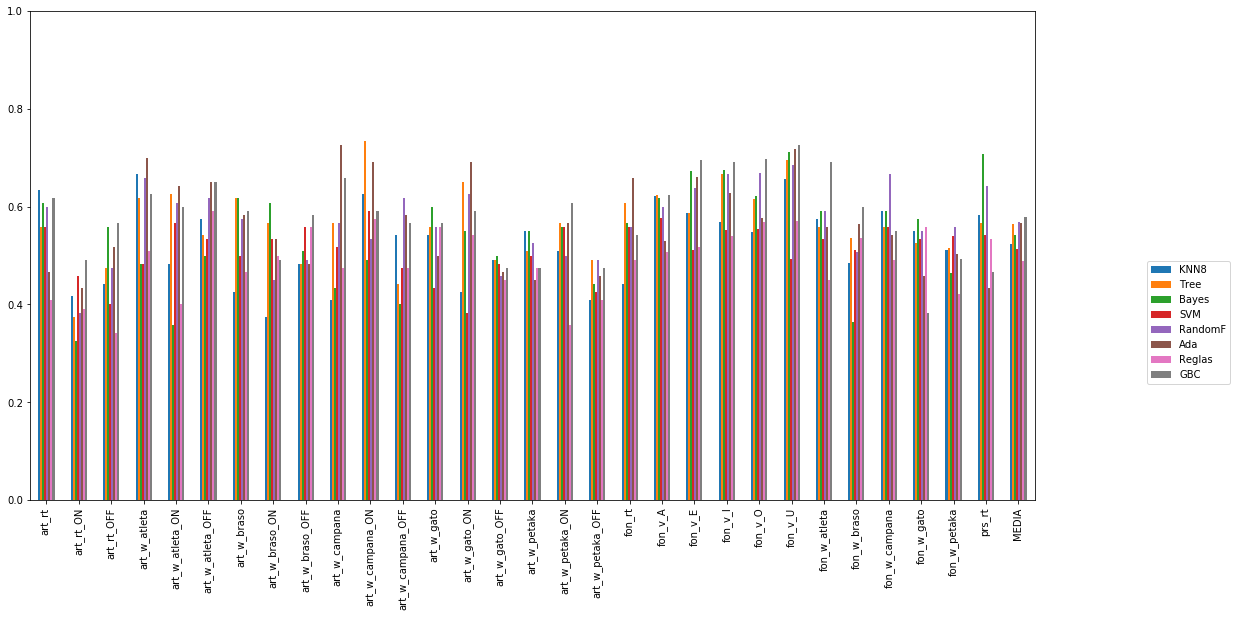

In [9]:
ex.process_results(all_results, data_names, model_names, 'bar')

### 1.1.2 Acuracy -  atribs normalizados <a id="acunorm"></a><a href="#index"><i class="fa fa-list-alt" aria-hidden="true"></i></a>
Mejor resultado: fon v_U y art_campana.  **(0.74 GBC-fon_v_U)**. 0 por encima del 0.8

In [6]:
ex = Experimenter()
name_exp,num_folds = ex.get_datos_generales(experimento)
data_names,data_X,data_y = ex.get_datasets(experimento, True)
model_names,models = ex.get_algoritmos(experimento)
score,rep_type = ex.get_output_options(experimento)
all_results = ex.cross_validate_all_models(data_names, data_X,data_y,models,num_folds,score)
clear_output()

In [7]:
ex.process_results(all_results, data_names, model_names, rep_type)

,KNN8,Tree,Bayes,SVM,RandomF,Ada,Reglas,GBC
art_rt,0.608333,0.583333,0.608333,0.691667,0.616667,0.483333,0.550000,0.616667
art_rt_ON,0.516667,0.341667,0.325000,0.350000,0.541667,0.433333,0.491667,0.516667
art_rt_OFF,0.575000,0.516667,0.558333,0.558333,0.550000,0.550000,0.558333,0.541667
art_w_atleta,0.616667,0.591667,0.483333,0.591667,0.483333,0.700000,0.575000,0.608333
art_w_atleta_ON,0.650000,0.666667,0.358333,0.541667,0.666667,0.583333,0.500000,0.616667
art_w_atleta_OFF,0.575000,0.541667,0.500000,0.525000,0.733333,0.650000,0.458333,0.666667
art_w_braso,0.591667,0.625000,0.616667,0.633333,0.616667,0.583333,0.558333,0.591667
art_w_braso_ON,0.541667,0.541667,0.608333,0.500000,0.425000,0.516667,0.583333,0.533333
art_w_braso_OFF,0.558333,0.550000,0.508333,0.483333,0.500000,0.483333,0.458333,0.566667
art_w_campana,0.533333,0.583333,0.433333,0.475000,0.500000,0.725000,0.483333,0.658333


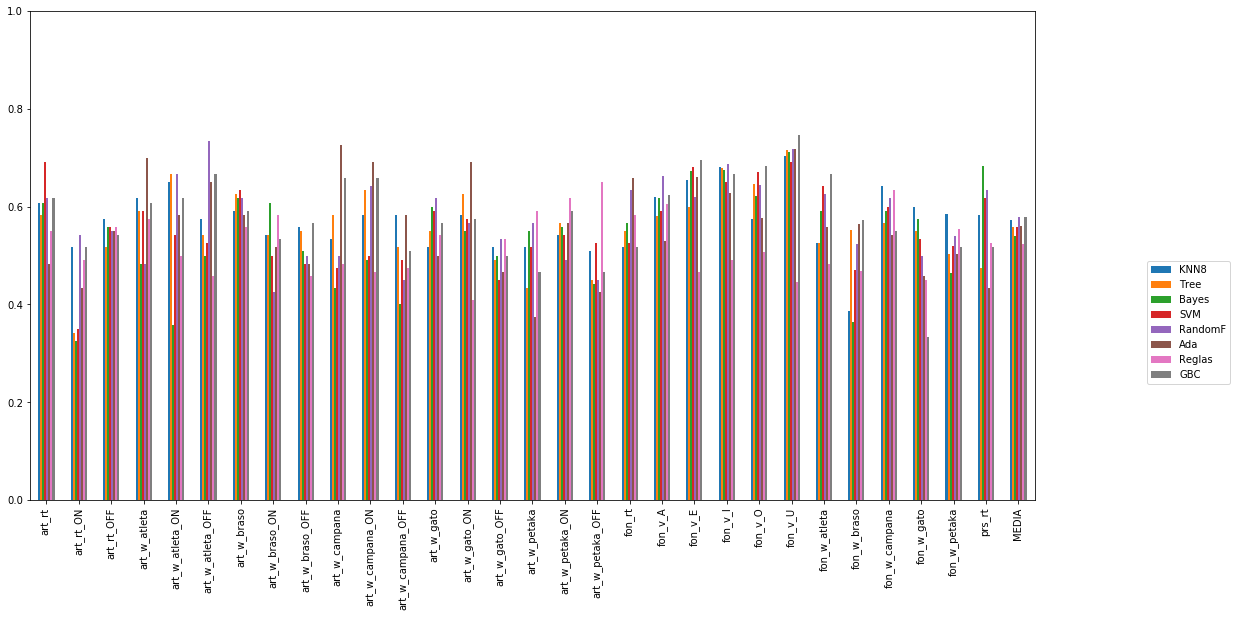

In [8]:
ex.process_results(all_results, data_names, model_names, 'bar')

### 1.1.3 Auc - sin modificar <a id="aucdef"></a><a href="#index"><i class="fa fa-list-alt" aria-hidden="true"></i></a>
El que mejor funciona es fon_v_U, y art_campana_ON. Los 2 mejores son Ada y GBC **(0.813 Ada-art_campanaON y GBC-fon_v_u)**. . 
Al igual que con las mujeres, **unvoiced** (exactas Orzco2016) nos ayuda a mejorar sensiblemente un resultado. El set art_campanaON en concreto.

In [9]:
experimento['OUTPUT']['METRIC']='roc_auc'
ex = Experimenter()
name_exp,num_folds = ex.get_datos_generales(experimento)
data_names,data_X,data_y = ex.get_datasets(experimento)
model_names,models = ex.get_algoritmos(experimento)
score,rep_type = ex.get_output_options(experimento)
all_results = ex.cross_validate_all_models(data_names, data_X,data_y,models,num_folds,score)
clear_output()

In [10]:
ex.process_results(all_results, data_names, model_names, rep_type)

,KNN8,Tree,Bayes,SVM,RandomF,Ada,Reglas,GBC
art_rt,0.662500,0.650000,0.654167,0.377778,0.570833,0.466667,0.516667,0.591667
art_rt_ON,0.333333,0.375000,0.266667,0.494444,0.343056,0.350000,0.508333,0.519444
art_rt_OFF,0.354167,0.508333,0.611111,0.486111,0.548611,0.633333,0.341667,0.630556
art_w_atleta,0.602778,0.591667,0.580556,0.513889,0.606944,0.794444,0.475000,0.683333
art_w_atleta_ON,0.483333,0.625000,0.358333,0.583333,0.681944,0.572222,0.558333,0.663889
art_w_atleta_OFF,0.634722,0.625000,0.550000,0.616667,0.636111,0.708333,0.566667,0.780556
art_w_braso,0.459722,0.616667,0.643056,0.558333,0.644444,0.616667,0.508333,0.658333
art_w_braso_ON,0.376389,0.550000,0.527778,0.569444,0.480556,0.577778,0.541667,0.441667
art_w_braso_OFF,0.493056,0.508333,0.550000,0.577778,0.454167,0.555556,0.475000,0.634722
art_w_campana,0.415278,0.600000,0.411111,0.379167,0.652778,0.763889,0.450000,0.736111


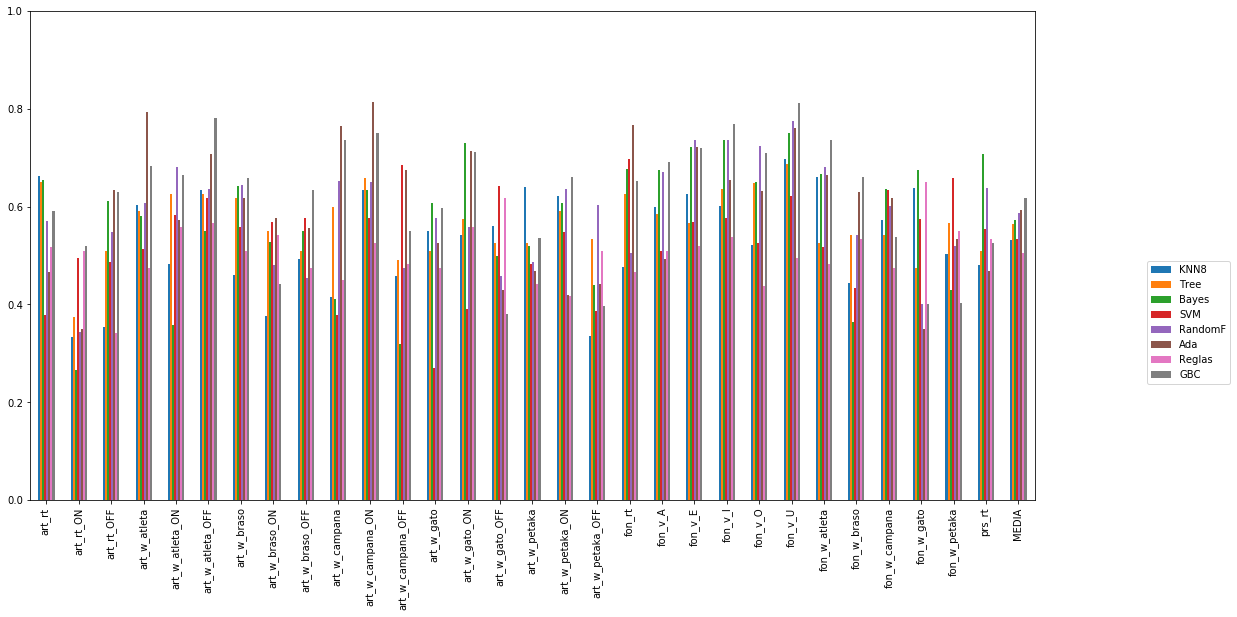

In [11]:
ex.process_results(all_results, data_names, model_names, 'bar')

### 1.1.4  Auc - Normalizados <a id="aucnorm"></a><a href="#index"><i class="fa fa-list-alt" aria-hidden="true"></i></a>
Resultados mejores con art_ccampana_on y fon_vu **(0.81 Ada-art_campanaOFF y GBC-fon_v_u)**

In [12]:
ex = Experimenter()
name_exp,num_folds = ex.get_datos_generales(experimento)
data_names,data_X,data_y = ex.get_datasets(experimento, True)
model_names,models = ex.get_algoritmos(experimento)
score,rep_type = ex.get_output_options(experimento)
all_results = ex.cross_validate_all_models(data_names, data_X,data_y,models,num_folds,score)
clear_output()

In [13]:
ex.process_results(all_results, data_names, model_names, rep_type)

,KNN8,Tree,Bayes,SVM,RandomF,Ada,Reglas,GBC
art_rt,0.640278,0.608333,0.654167,0.736111,0.577778,0.477778,0.508333,0.602778
art_rt_ON,0.572222,0.300000,0.266667,0.338889,0.545833,0.350000,0.383333,0.505556
art_rt_OFF,0.629167,0.533333,0.611111,0.605556,0.602778,0.600000,0.566667,0.605556
art_w_atleta,0.647222,0.566667,0.580556,0.713889,0.529167,0.794444,0.558333,0.661111
art_w_atleta_ON,0.656944,0.666667,0.358333,0.469444,0.508333,0.550000,0.441667,0.688889
art_w_atleta_OFF,0.623611,0.591667,0.550000,0.644444,0.523611,0.708333,0.441667,0.791667
art_w_braso,0.586111,0.675000,0.643056,0.694444,0.619444,0.605556,0.450000,0.570833
art_w_braso_ON,0.547222,0.525000,0.527778,0.511111,0.400000,0.544444,0.391667,0.452778
art_w_braso_OFF,0.487500,0.458333,0.550000,0.463889,0.558333,0.544444,0.508333,0.613889
art_w_campana,0.497222,0.566667,0.416667,0.491667,0.631944,0.763889,0.358333,0.750000


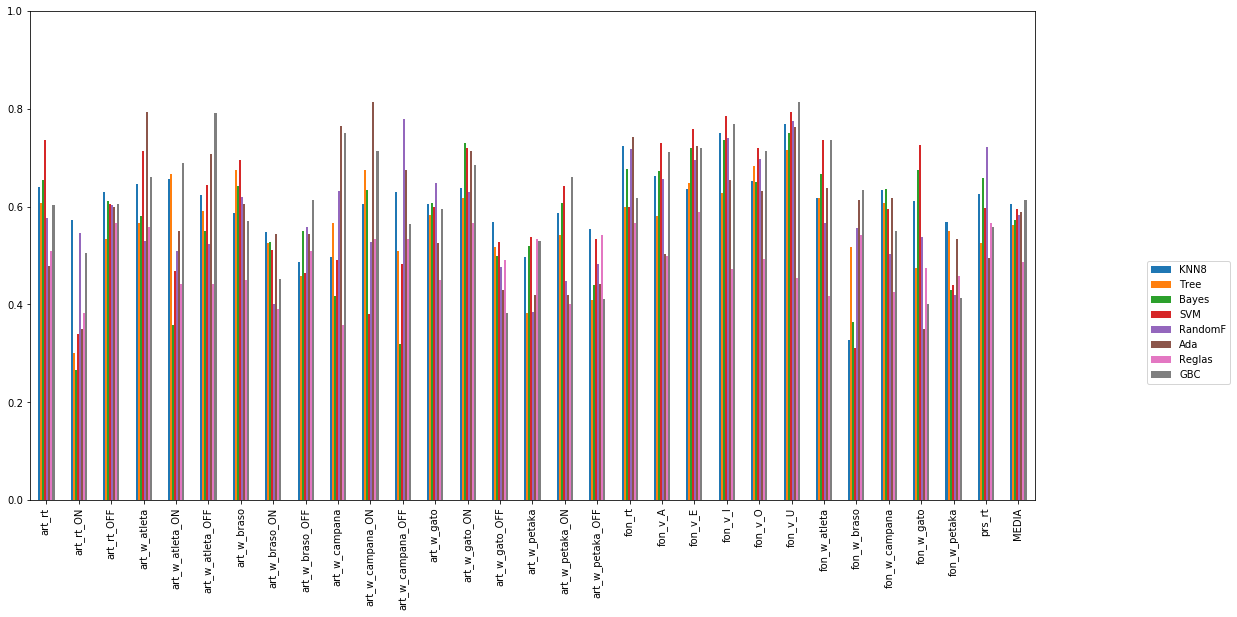

In [14]:
ex.process_results(all_results, data_names, model_names, 'bar')

## 1.2 Grid Search Orozco <a id="gssvm"></a><a href="#index"><i class="fa fa-list-alt" aria-hidden="true"></i></a>
Explicada las funciones, parámetros devueltos y funcionamiento del experimento en notebooks anteriores y documentación de la calse. Experimento artículo 2016 Orozco: SVM con kernel gaussiano haciendo gridSearch de parámetros C y  𝛾  realizando 10-fold cross-validation. SCORING:AUC.  **Mejores resultados normalizando**.

**Si que se mejoran, pero poco (0.03), los scores en este tipo de experimento en comparación con todo lo realizado anteriormente: disvoice y disvoice + edad y sexo**.**Similares e incluso un poco mejores pero de manera casi inapreciable al de las mujeres**. Mejor: **(fon_v_I 0.769)**

In [15]:
def best_to_panda(mej):
    return pd.DataFrame.from_dict(mej, orient='index',columns=['SCORE']).sort_values(by=['SCORE'], ascending=False)

In [16]:
ex = Experimenter()
param_grid = [
      {'C': [1,10,20,50,100,200,500,1000,2000,5000,10000], 'kernel': ['rbf'], 'gamma' : [1,10,20,50,100,200,500,1000]},
 ]

bestsOrz = ex.GridSearchPipe(cargaDatosHombres,svm.SVC(),param_grid, verbose=False, normalizar=True)
best_to_panda(bestsOrz)

,SCORE
fon_v_I,0.769707
fon_v_U,0.747003
prs_rt,0.725000
art_w_atleta_onset,0.725000
fon_v_E,0.695504
art_w_braso_onset,0.690278
art_w_atleta_ofset,0.680556
art_w_gato,0.680556
fon_w_atleta,0.677778
fon_v_O,0.672991


## 1.3 Variance Treshold <a id="vtres"></a><a href="#index"><i class="fa fa-list-alt" aria-hidden="true"></i></a>
SCORING = AUC. AdaBoost  **(0.813 art_campana_Onset-AdaBoost)** igual que antes con params por defecto y atributos normalizados.

In [17]:
modulo = cargaDatosHombres

In [18]:
def seleccion_atribs_pipe(modulo, selector, clsf):
    res=[]
    for dtst in [ d for d in dir(modulo) if d.startswith('load')]:
        datos = getattr(modulo, dtst)()
        X = datos.data
        y = datos.target
        sc = MinMaxScaler()
        X = sc.fit(X).transform(X) if clsf != 'AdaBoostClassifier' else X #Comentar para no normalizar
        params = 'chi2, K=19' if selector == 'SelectKBest' else ''
        params = 'threshold=(0.1)' if selector == 'VarianceThreshold' and clsf == 'AdaBoostClassifier' else ''
        estimators = [('feat_sel', eval(selector+'('+params+')')), ('clf', eval(clsf+'()'))]
        pipe = Pipeline(estimators)
        sc=cross_val_score(pipe, X, y, cv=10, scoring='roc_auc').mean()
        res.append(sc)
    return res

In [19]:
df_VT = pd.DataFrame(index=[ d[5:] for d in dir(modulo) if d.startswith('load')])
clasificadores = ['AdaBoostClassifier', 'GradientBoostingClassifier', 'svm.SVC', 'RandomForestClassifier']
for clf in clasificadores:
    res= seleccion_atribs_pipe(modulo, 'VarianceThreshold',clf)
    df_VT[clf[:7]]= pd.DataFrame(res,[ d[5:] for d in dir(modulo) if d.startswith('load')],columns=[clf[:7]])
df_VT

,AdaBoos,Gradien,svm.SVC,RandomF
art_rt,0.475000,0.544444,0.736111,0.652778
art_rt_ofset,0.611111,0.608333,0.605556,0.530556
art_rt_onset,0.350000,0.580556,0.338889,0.534722
art_w_atleta,0.761111,0.625000,0.713889,0.627778
art_w_atleta_ofset,0.708333,0.780556,0.644444,0.672222
art_w_atleta_onset,0.547222,0.661111,0.469444,0.795833
art_w_braso,0.602778,0.669444,0.694444,0.565278
art_w_braso_ofset,0.544444,0.625000,0.463889,0.431944
art_w_braso_onset,0.544444,0.463889,0.511111,0.537500
art_w_campana,0.797222,0.736111,0.491667,0.619444


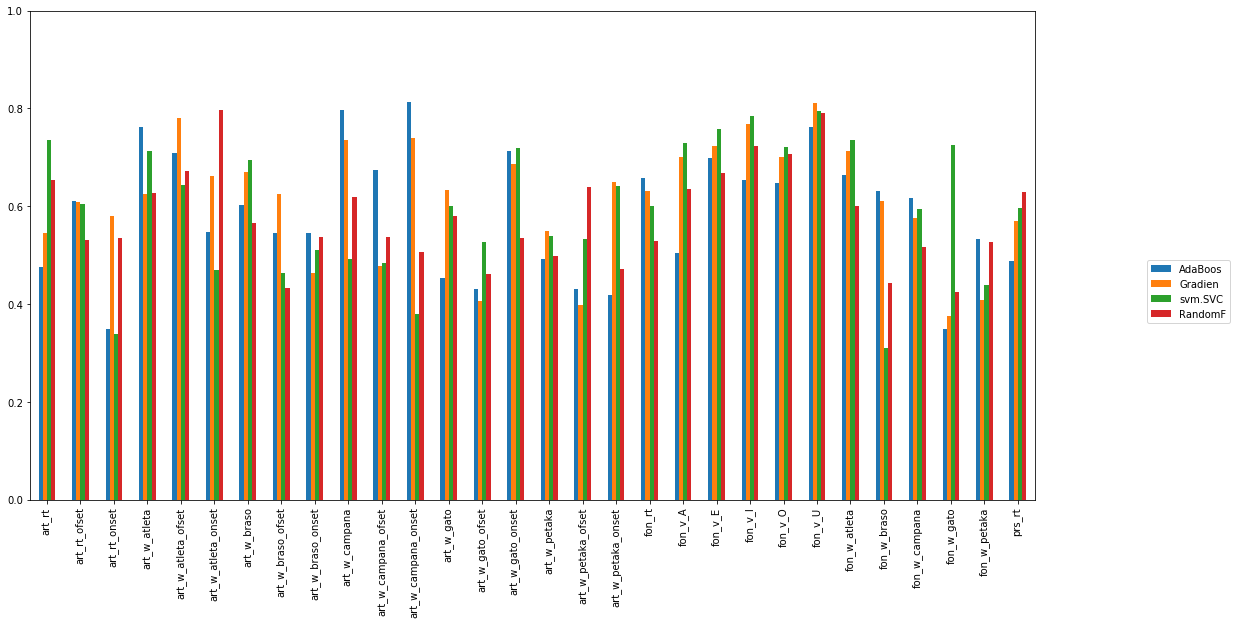

In [20]:
df_VT.plot(kind='bar', ylim=(0,1), figsize=(18,9)).legend(bbox_to_anchor=(1.2, 0.5))

## 1.4 SKBEST <a id="skbest"></a><a href="#index"><i class="fa fa-list-alt" aria-hidden="true"></i></a>
Mejores resultados art_campana, art_ rt y art_gato_onset. 4 por encima de 0.8. **(0.838 GBC-art_w_gato_on) y (0.836 SVM-Fon_v_I)** 7 por enmcima de 0.8

In [21]:
df_SK = pd.DataFrame(index=[ d[5:] for d in dir(modulo) if d.startswith('load')])
clasificadores = ['AdaBoostClassifier', 'GradientBoostingClassifier', 'svm.SVC', 'RandomForestClassifier']
for clf in clasificadores:
    res= seleccion_atribs_pipe(modulo, 'SelectKBest',clf)
    df_SK[clf[:7]]= pd.DataFrame(res,[ d[5:] for d in dir(modulo) if d.startswith('load')],columns=[clf[:7]])
df_SK

,AdaBoos,Gradien,svm.SVC,RandomF
art_rt,0.602778,0.641667,0.686111,0.662500
art_rt_ofset,0.633333,0.563889,0.652778,0.561111
art_rt_onset,0.536111,0.594444,0.483333,0.480556
art_w_atleta,0.816667,0.772222,0.719444,0.819444
art_w_atleta_ofset,0.702778,0.725000,0.733333,0.713889
art_w_atleta_onset,0.677778,0.752778,0.555556,0.645833
art_w_braso,0.529167,0.497222,0.705556,0.745833
art_w_braso_ofset,0.636111,0.686111,0.472222,0.581944
art_w_braso_onset,0.283333,0.394444,0.422222,0.415278
art_w_campana,0.766667,0.666667,0.608333,0.602778


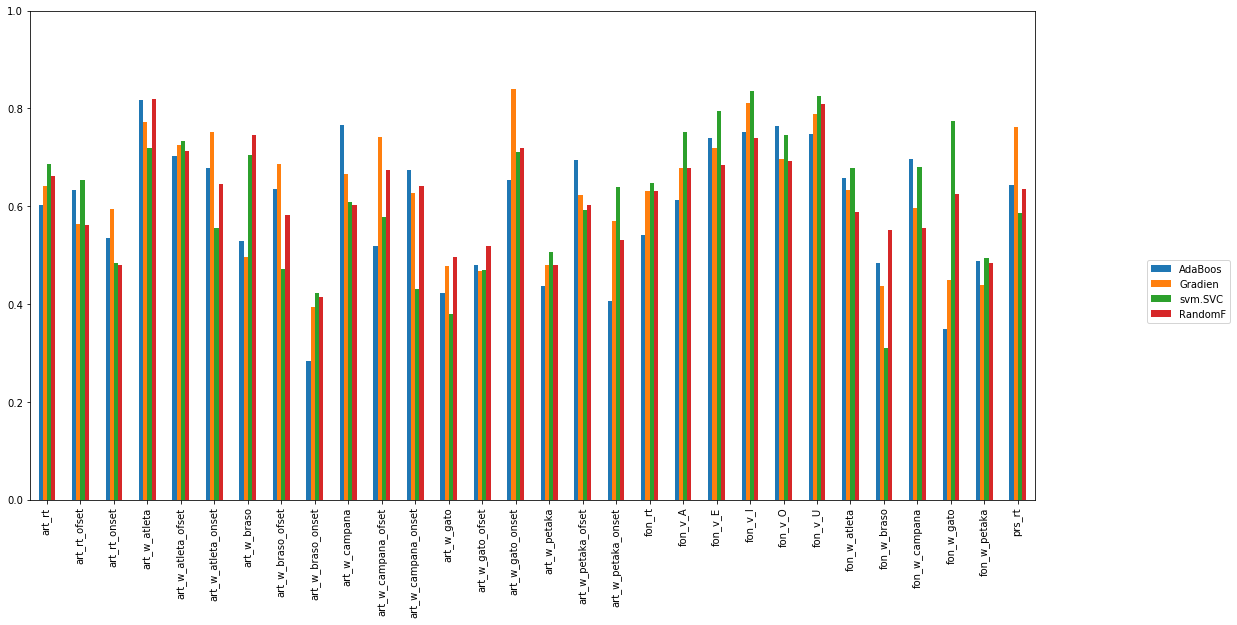

In [22]:
df_SK.plot(kind='bar', ylim=(0,1), figsize=(18,9)).legend(bbox_to_anchor=(1.2, 0.5))

## 1.5 Grid Search - Variance Treshold + AdaBoost <a id="vtab"></a><a href="#index"><i class="fa fa-list-alt" aria-hidden="true"></i></a>
**Tonica habitual: mejores los art: (transiciones), todos suben por lo general, algunos por encima del 0.8.** Sin embargo, **no se alcanzan los resultados de los datasets de las mujeres** (0.9, 0.88..). 

Mejor: **(0.838 art_w_campana_onset)**

##### Sin Normalizar 

In [23]:
ex = Experimenter()
param_grid = dict(select__threshold=[0.05, 0.08, 0.16, 0.2, 0.4 ])
pip = Pipeline([('select', VarianceThreshold()), ('clf', AdaBoostClassifier())])

bestsGsVtAda = ex.GridSearchPipe(cargaDatosHombres, pip, param_grid, verbose=False, normalizar=False)

In [24]:
best_to_panda(bestsGsVtAda)

,SCORE
art_w_campana_onset,0.813889
fon_v_U,0.781569
art_w_atleta_ofset,0.772222
art_w_gato_onset,0.736111
art_w_atleta,0.711111
fon_v_E,0.688616
art_w_campana,0.683333
fon_v_O,0.669133
fon_v_I,0.662213
fon_w_braso,0.661111


##### Normalizando

In [25]:
param_grid = dict(select__threshold=[0.01, 0.02, 0.03, 0.04])
ex = Experimenter()
bestsGsVtAdaN = ex.GridSearchPipe(cargaDatosHombres, pip, param_grid,verbose=False, normalizar=True)
best_to_panda(bestsGsVtAdaN)

,SCORE
art_w_campana_onset,0.838889
art_w_atleta_ofset,0.805556
fon_rt,0.794444
art_w_gato_onset,0.775000
fon_v_E,0.756601
art_w_atleta,0.747222
fon_v_U,0.741295
fon_v_O,0.700606
art_rt_ofset,0.694444
art_w_campana,0.683333


-----------------------
## 1.6 Grid Search - Seleckt KBest + RF <a id="skrf"></a><a href="#index"><i class="fa fa-list-alt" aria-hidden="true"></i></a>
**Mejores resultados para hombres 0.81 y 0.80 para art_w_braso y fon_v_I**
En este caso se obtienen resultados muy similares a los de los conjuntos de las mujeres.

In [26]:
ex = Experimenter()
param_grid = dict(select__k=[10,15,22], clf__min_samples_leaf=[1,3,5,10], clf__max_depth=[5, None], clf__n_estimators=[10, 25, 40])
pip = Pipeline([('select', SelectKBest(chi2)), ('clf', RandomForestClassifier())])
bestsGsSkRfN = ex.GridSearchPipe(cargaDatosHombres, pip, param_grid,verbose=False, normalizar=True)
best_to_panda(bestsGsSkRfN)

,SCORE
art_w_braso,0.816667
fon_v_I,0.807143
fon_v_U,0.761256
art_w_atleta_ofset,0.750000
fon_v_E,0.736320
art_w_atleta,0.730556
art_w_atleta_onset,0.727778
fon_v_O,0.707717
fon_v_A,0.696317
art_rt_ofset,0.688889


## 1.7 Grid Search - Seleckt KBest + AdaBoost <a id="skada"></a><a href="#index"><i class="fa fa-list-alt" aria-hidden="true"></i></a>
En este experimento y los demás restantesse sigue la tónica general del experimento para los hombre: Mejoran a Disvoice normal pero los resultados punteros no llegan a los de las mujeres

In [28]:
ex = Experimenter()
param_grid = dict(select__k=[10,15,22])
pip = Pipeline([('select', SelectKBest(chi2)), ('clf', AdaBoostClassifier())])
bestsGsSkADAN = ex.GridSearchPipe(cargaDatosHombres, pip, param_grid,verbose=False, normalizar=True)

In [29]:
best_to_panda(bestsGsSkADAN).head()

,SCORE
art_w_campana_onset,0.816667
art_w_campana,0.800000
fon_v_I,0.773406
art_w_atleta,0.769444
fon_v_E,0.768399


## 1.8 Grid Search - Seleckt KBest + GBC<a id="skgbc"></a><a href="#index"><i class="fa fa-list-alt" aria-hidden="true"></i></a>

In [30]:
ex = Experimenter()
param_grid = dict(select__k=[10,15,22])
pip = Pipeline([('select', SelectKBest(chi2)), ('clf', GradientBoostingClassifier())])
bestsGsSkGBCN = ex.GridSearchPipe(cargaDatosHombres, pip, param_grid,verbose=False, normalizar=True)

In [31]:
best_to_panda(bestsGsSkGBCN).head()

,SCORE
art_w_atleta_ofset,0.866667
fon_v_I,0.833386
fon_v_U,0.800191
art_w_atleta,0.800000
art_w_gato_onset,0.761111
